# Quant Data Analysis

## Objective
To find insights/recommendations from the Customer Orders dataset.

## Insights
Following are the insights observed
* Steady increase in **customers** for all regions (Central, South, West and East) except North
* For year 2016: West, South and East experienced strong **sales growth (YoY)**  compared to Central which had minor decline in sales compared to 2015. West : +34%, South : +31%, East : +18%, Central : -0.22%
* South Region YoY profit for 2016 declined by ~ 50% compared to 2015 despite showing strong YoY growth in sales for 2016
* November month is the busiest month with maximum number of orders : 725. It makes sense because of events like Thanksgiving and Black Friday. Also, November month has maximum offered discount which could be a reason why it has maximum orders
* Office Supply is most popular category across all regions for all segments which includes Consumers,Corporate and Home Office.


## Data Analysis

In [100]:
# Import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt 
import calendar

In [101]:
# read the dataset
quant_df = pd.read_excel('Quant Round.xlsx')

## Exploratory Anaysis

First try to explore and understand the data, inorder to get familiar with all the variables present in the dataset.
Check if there are any outliers or missing values in the dataset which needs to be handled.

In [280]:
quant_df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Item Price,Quantity,SalesTotal,Discount,Profit
0,2718,CA-2011-100006,2013-09-07,41530,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,...,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,125.990,3,377.970,0.0,109.6113
1,6288,CA-2011-100090,2013-07-08,41467,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,West,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,167.496,3,502.488,0.2,-87.9354


In [94]:
quant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null int64
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Item Price       9994 non-null float64
Quantity         9994 non-null int64
SalesTotal       9994 non-null float64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), 

In [31]:
quant_df.describe()

,Row ID,Ship Date,Postal Code,Item Price,Quantity,SalesTotal,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,42128.963178,55190.379428,67.253369,3.789574,229.858001,0.156203,28.656896
std,2885.163629,420.455211,32063.693350,287.157149,2.225110,623.245101,0.206452,234.260108
min,1.000000,41281.000000,1040.000000,0.336000,1.000000,0.444000,0.000000,-6599.978000
25%,2499.250000,41786.000000,23223.000000,5.477000,2.000000,17.280000,0.000000,1.728750
50%,4997.500000,42185.000000,56430.500000,16.271000,3.000000,54.490000,0.200000,8.666500
75%,7495.750000,42508.000000,90008.000000,63.940000,5.000000,209.940000,0.200000,29.364000
max,9994.000000,42740.000000,99301.000000,10559.992000,14.000000,22638.480000,0.800000,8399.976000


In [32]:
# Check if there are any null values in the dataset
quant_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Item Price       0
Quantity         0
SalesTotal       0
Discount         0
Profit           0
dtype: int64

### Data Pre-processing

The dates in the Order Date and Ship Date are in number format so changed it to date format and created a new column to extract  year and month from the dates.

In [102]:
quant_df['Order month'] = quant_df['Order Date'].dt.month
quant_df['Order month'] = quant_df['Order month'].apply(lambda x: calendar.month_abbr[x])
quant_df['Order year'] = quant_df['Order Date'].dt.year

**Outlier detection:**
The item price for rowID -6570 in dataset is incorrect, as it is showing very high value for chairs. But as observed with the same product ID in same region(central) the item price was $105. Hence changed the price of the item to make it consistent in the dataset.

In [ ]:
quant_df.loc[quant_df['Row ID']==6570, 'Item Price']= 105.686

Now, the dataset is clean as the outliers and required date formats have been handled. The data can now be used to get insights.

## Year over year growth analysis

### Year over Year growth in Customers by region

In [114]:
yoy_growth_customers = quant_df.groupby(['Order year','Region'])['Customer ID'].nunique()
yoy_growth_customers_df = pd.DataFrame(yoy_growth_customers)
yoy_growth_customers_df.reset_index(inplace=True)
yoy_growth_customers_df=yoy_growth_customers_df.groupby(['Order year','Region'])['Customer ID'].sum()
customer=pd.DataFrame(yoy_growth_customers_df).reset_index()
pd.pivot_table(customer, values='Customer ID',index='Region',columns='Order year')

Order year,2013,2014,2015,2016
Region,,,,
Central,204.0,201.0,261.0,325.0
East,228.0,246.0,302.0,354.0
North,33.0,5.0,NaN,NaN
South,140.0,155.0,186.0,224.0
West,269.0,276.0,327.0,400.0


*Observation:*
* Looking at the table above, it can be seen that West and East region has the most number of unique customers, closely followed by Central and South.
* Customers have generally increased over years in all the regions except in North region where customers have declined.

Next, I wanted to check the year over year growth in sales to see if the increase or decrease in customers is affecting the sales in the regions or not

### Year over Year growth in Sales by region

In [118]:
# yoy growth in sales

yoy_growth_sales = quant_df.groupby(by=['Order year','Region'])['SalesTotal'].sum()
yoy_growth_sales_df = pd.DataFrame(yoy_growth_sales)
yoy_growth_sales_df.reset_index(inplace=True)

sales=pd.pivot_table(yoy_growth_sales_df,values='SalesTotal',index='Region',columns='Order year')
sales['YoY sales growth 2014 (%)']=((sales[2014]/sales[2013])-1)*100
sales['YoY sales growth 2015 (%)']=((sales[2015]/sales[2014])-1)*100
sales['YoY sales growth 2016 (%)']=((sales[2016]/sales[2015])-1)*100
sales[['YoY sales growth 2014 (%)', 'YoY sales growth 2015 (%)','YoY sales growth 2016 (%)']]

Order year,YoY sales growth 2014 (%),YoY sales growth 2015 (%),YoY sales growth 2016 (%)
Region,,,
Central,-0.928312,43.310319,-0.224682
East,21.488578,15.478113,18.119000
North,-99.143378,NaN,NaN
South,0.741594,31.606647,31.471136
West,-5.353409,33.586502,34.045280


*Observation:*
* In 2016 the percentage sales has decreased by 0.22% in Central region

Since the sales has decreased in the Central region, next I want to check if there is a correlation between profit and sales. If decrease in sales is resulting in decrease in profit as well.

### Year over Year growth in Profits by region

In [119]:
# yoy in profits

yoy_growth_profit = quant_df.groupby(by=['Order year','Region'])['Profit'].sum()
yoy_growth_profit_df = pd.DataFrame(yoy_growth_profit)
yoy_growth_profit_df.reset_index(inplace=True)

profit=pd.pivot_table(yoy_growth_profit_df,values='Profit',index='Region',columns='Order year')
profit['YoY profit growth 2014 (%)']=((profit[2014]/profit[2013])-1)*100
profit['YoY profit growth 2015 (%)']=((profit[2015]/profit[2014])-1)*100
profit['YoY profit growth 2016 (%)']=((profit[2016]/profit[2015])-1)*100
profit[['YoY profit growth 2014 (%)', 'YoY profit growth 2015 (%)','YoY profit growth 2016 (%)']]

Order year,YoY profit growth 2014 (%),YoY profit growth 2015 (%),YoY profit growth 2016 (%)
Region,,,
Central,2071.574120,69.834422,-62.054463
East,23.631277,-4.334556,64.522261
North,-115.860386,NaN,NaN
South,-30.643738,113.048194,-49.914151
West,2.125536,16.922261,83.225126


*Observation:*
* Despite South having second highest growth rate in terms of sales in 2016, profit in South region has decreased by 50%

## Order Analysis

### Which month shows the maximum orders?

[<matplotlib.text.Text at 0x10fac4a8>, <matplotlib.text.Text at 0x10fcde10>]

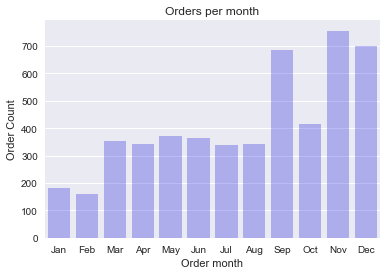

In [107]:
orders_by_month = quant_df.groupby(by='Order month')['Order ID'].nunique()
orders_by_month_df =pd.DataFrame(orders_by_month)
orders_by_month_df.reset_index(inplace=True)
orders_by_month_df
sns.barplot(x='Order month', y='Order ID', data =orders_by_month_df, color='blue', alpha=0.3, x_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).set(title='Orders per month', ylabel='Order Count')

*Observation:*
* Every year most of the orders are placed in November. Let's further explore if there is any specific reason that people generally prefer buying during that time?

To answer the above question , based on my assumption that there is Black friday and thanks giving sales in November. I wanted to check if that could be the reason for high number of orders.
For this I tried to see the year round discount offerings in different months.

### Which month shows the maximum discount on the orders?

[<matplotlib.text.Text at 0x10df40f0>, <matplotlib.text.Text at 0xeeabdd8>]

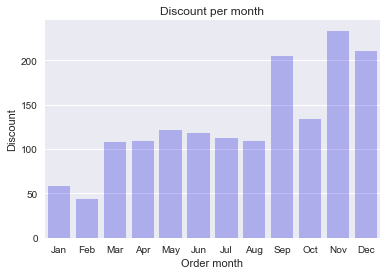

In [110]:
discount_by_month = quant_df.groupby(by='Order month')['Discount'].sum()
discount_by_month_df =pd.DataFrame(discount_by_month)
discount_by_month_df.reset_index(inplace=True)
discount_by_month_df
sns.barplot(x='Order month', y='Discount', data =discount_by_month_df, color='blue', alpha=0.3,x_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).set(title='Discount per month', ylabel='Discount')

*Observation:*
* Since majority of the discounts are offered in November so it is expected that most number of orders are also placed in November.

## Customer segment and Product Analysis

### Which is the most popular Customer segment in different regions?

[<matplotlib.text.Text at 0xe94ce48>, <matplotlib.text.Text at 0x108bf908>]

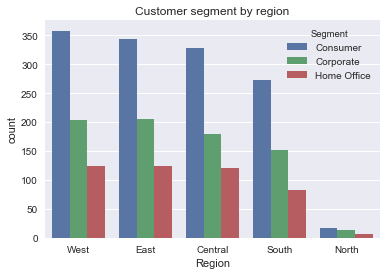

In [116]:
csegments_in_region = quant_df.groupby(by =['Region','Segment'])['Customer ID'].nunique().sort_values(ascending=False)
csegments_in_region_df = pd.DataFrame(csegments_in_region)
csegments_in_region_df.reset_index(inplace=True)
sns.barplot(x='Region', y='Customer ID', data=csegments_in_region_df, hue ='Segment').set(ylabel = 'count'
                                                                         , title = 'Customer segment by region')

### What type of Product category is most popular in different regions?

[<matplotlib.text.Text at 0xf2fca20>, <matplotlib.text.Text at 0xf321be0>]

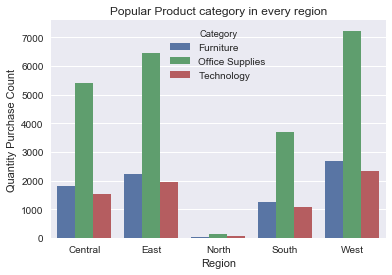

In [93]:
popular_product_category = quant_df.groupby(by=['Region','Category'])['Quantity'].sum().sort_values(ascending=False)
popular_product_category_df=pd.DataFrame(popular_product_category)
popular_product_category_df.reset_index(inplace=True)
popular_product_category_df=popular_product_category_df.groupby(['Region','Category'])['Quantity'].max()
popular_product_category_df=pd.DataFrame(popular_product_category_df)
popular_product_category_df.reset_index(inplace=True)
sns.barplot(x='Region', y='Quantity', data =popular_product_category_df, hue='Category').set(title='Popular Product category in every region',
                                                                                            ylabel='Quantity Purchase Count')

*Observation:*
* Across all the regions, Consumer segment is highly dominated over Corporate and Home Offices and the most frequently bought product category is Office Supplies.